In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [5]:
# import data
game_df=pd.read_csv("csvfiles/game.csv")
game_df.head()

,Unnamed: 0,name,number of platforms,platforms,number of stores,stores,number of genres,genres,tags,release date,rating,max rating,rating count,metacritic score,added,month
0,0,The Witcher 3: Wild Hunt,4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",3,"['Adventure', 'Action', 'RPG']","['Full controller support', 'Action RPG', 'Atm...",2015-05-18,4.67,5,3461,93,"{'yet': 558, 'owned': 6109, 'beaten': 2395, 't...",5
1,1,Life is Strange,9,"['PC', 'PlayStation', 'Xbox', 'iOS', 'Android'...",7,"['Steam', 'PlayStation Store', 'Xbox Store', '...",1,['Adventure'],"['Full controller support', 'Atmospheric', 'Ch...",2015-01-29,4.10,5,2211,83,"{'yet': 462, 'owned': 6136, 'beaten': 1903, 't...",1
2,2,Red Dead Redemption 2,3,"['PC', 'PlayStation', 'Xbox']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",3,"['Adventure', 'Action', 'RPG']","['In-App Purchases', 'America', 'Partial Contr...",2018-10-26,4.56,5,2533,96,"{'yet': 398, 'owned': 4197, 'beaten': 1253, 't...",10
3,3,DOOM (2016),4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",2,"['Shooter', 'Action']","['Partial Controller Support', 'Steam Achievem...",2016-05-13,4.39,5,2171,85,"{'yet': 314, 'owned': 4828, 'beaten': 1518, 't...",5
4,4,Fallout 4,3,"['PC', 'PlayStation', 'Xbox']",3,"['Steam', 'PlayStation Store', 'Xbox Store']",2,"['Action', 'RPG']","['Full controller support', 'Action RPG', 'Ste...",2015-11-09,3.75,4,1984,84,"{'yet': 292, 'owned': 4821, 'beaten': 1229, 't...",11


In [50]:
# get a dataframe of each game' genre and rating - note for games with multiple genre, rows are repeated
genre=[]
rating=[]
metacritic=[]

for i in game_df.index:
    curr_genre=game_df.loc[i,"genres"].split("'")
    genre.append(curr_genre[1])
    rating.append(game_df.loc[i,"rating"])
    metacritic.append(game_df.loc[i,"metacritic score"])

genre_df=pd.DataFrame(
    {
        "genre":genre,
        "rating":rating,
        "metacritic":metacritic
    }
)

genre_df

,genre,rating,metacritic
0,Adventure,4.67,93
1,Adventure,4.10,83
2,Adventure,4.56,96
3,Shooter,4.39,85
4,Action,3.75,84
...,...,...,...
1175,Action,3.88,78
1176,Adventure,3.78,89
1177,Casual,3.79,78
1178,Adventure,3.57,59


In [51]:
# get summary of rating by genre

genre_summary=pd.DataFrame(genre_df.groupby("genre").agg(["count","mean","median","var","std","sem"]))

genre_summary

rating                                                 \
                       count      mean median       var       std       sem   
genre                                                                         
Action                   110  3.592000  3.695  0.380036  0.616471  0.058778   
Adventure                199  3.676884  3.720  0.300512  0.548190  0.038860   
Arcade                    12  3.675000  3.720  0.109845  0.331429  0.095675   
Card                       6  3.701667  3.695  0.223537  0.472797  0.193018   
Casual                    72  3.566389  3.750  0.325530  0.570553  0.067240   
Educational                4  3.267500  3.330  0.396825  0.629940  0.314970   
Family                     8  3.786250  3.710  0.099455  0.315365  0.111499   
Fighting                   5  3.740000  3.630  0.241000  0.490918  0.219545   
Indie                    362  3.425138  3.470  0.330817  0.575167  0.030230   
Massively Multiplayer     12  3.272500  3.220  0.221075  0.470186  0.135731   
Platformer                28  3.867500  4.055  0.387101  0.622174  0.117580   
Puzzle                     1  4.300000  4.300       NaN       NaN       NaN   
RPG                       34  3.850882  3.935  0.270548  0.520142  0.089204   
Racing                    48  3.492917  3.475  0.189349  0.435142  0.062807   
Shooter                   95  3.542947  3.590  0.310974  0.557651  0.057214   
Simulation                12  3.663333  3.640  0.123115  0.350878  0.101290   
Sports                    13  3.420000  3.420  0.070367  0.265267  0.073572   
Strategy                 159  3.482956  3.540  0.337267  0.580747  0.046056   

                      metacritic                                           \
                           count       mean median         var        std   
genre                                                                       
Action                       110  75.681818   76.0   99.576731   9.978814   
Adventure                    199  74.753769   76.0  106.418862  10.315952   
Arcade                        12  75.666667   75.5   80.787879   8.988208   
Card                           6  80.333333   80.0   40.266667   6.345602   
Casual                        72  75.111111   76.0   63.226917   7.951536   
Educational                    4  77.750000   80.0   46.916667   6.849574   
Family                         8  76.375000   77.5   73.410714   8.568005   
Fighting                       5  77.400000   77.0  130.300000  11.414903   
Indie                        362  73.403315   75.0   84.374283   9.185547   
Massively Multiplayer         12  75.583333   77.0   62.446970   7.902340   
Platformer                    28  82.535714   82.5   42.332011   6.506305   
Puzzle                         1  80.000000   80.0         NaN        NaN   
RPG                           34  75.941176   80.0  115.511586  10.747632   
Racing                        48  75.062500   75.5  100.825798  10.041205   
Shooter                       95  74.136842   78.0  132.587458  11.514663   
Simulation                    12  73.416667   73.0   99.356061   9.967751   
Sports                        13  78.384615   79.0   62.256410   7.890273   
Strategy                     159  76.132075   76.0   64.241939   8.015107   

                                 
                            sem  
genre                            
Action                 0.951443  
Adventure              0.731278  
Arcade                 2.594672  
Card                   2.590581  
Casual                 0.937097  
Educational            3.424787  
Family                 3.029247  
Fighting               5.104900  
Indie                  0.482782  
Massively Multiplayer  2.281209  
Platformer             1.229576  
Puzzle                      NaN  
RPG                    1.843204  
Racing                 1.449323  
Shooter                1.181379  
Simulation             2.877442  
Sports                 2.188368  
Strategy               0.635639

In [52]:
# only examining genre that have at list 100 ratings
top_genre=genre_summary.index[genre_summary["rating"]["count"]>100]
for i in genre_df.index:
    if genre_df.loc[i,"genre"] in top_genre:
        genre_df.loc[i,"top genre"]=True
    else:
        genre_df.loc[i,"top genre"]=False
genre_df

,genre,rating,metacritic,top genre
0,Adventure,4.67,93,True
1,Adventure,4.10,83,True
2,Adventure,4.56,96,True
3,Shooter,4.39,85,False
4,Action,3.75,84,True
...,...,...,...,...
1175,Action,3.88,78,True
1176,Adventure,3.78,89,True
1177,Casual,3.79,78,False
1178,Adventure,3.57,59,True


In [53]:
# get a shortened genre_df with only the top genres
genre_df_short=genre_df[genre_df["top genre"]==True]
genre_df_short

,genre,rating,metacritic,top genre
0,Adventure,4.67,93,True
1,Adventure,4.10,83,True
2,Adventure,4.56,96,True
4,Action,3.75,84,True
5,Adventure,4.61,94,True
...,...,...,...,...
1171,Indie,2.25,40,True
1172,Adventure,1.83,27,True
1175,Action,3.88,78,True
1176,Adventure,3.78,89,True


Text(0.5, 0.98, ' ')

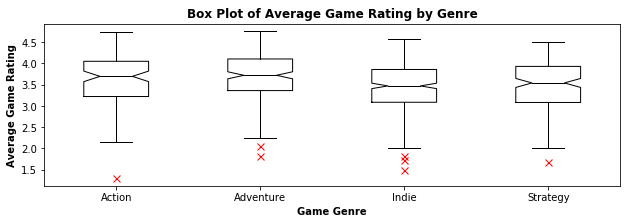

In [67]:
genre_df_short.boxplot("rating",by="genre",figsize=(10,3),grid=False,\
                       notch=True,color="black",\
                       flierprops=dict(marker='x',markersize=7, markeredgecolor="red"))
plt.title("Box Plot of Average Game Rating by Genre",fontweight="bold")
plt.xlabel("Game Genre", fontweight="bold")
plt.ylabel("Average Game Rating", fontweight="bold")
plt.suptitle(" ")


Text(0.5, 0.98, ' ')

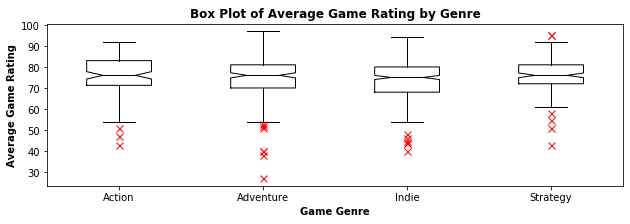

In [68]:
genre_df_short.boxplot("metacritic",by="genre",figsize=(10,3),grid=False,\
                       notch=True,color="black",\
                       flierprops=dict(marker='x',markersize=7, markeredgecolor="red"))
plt.title("Box Plot of Average Game Rating by Genre",fontweight="bold")
plt.xlabel("Game Genre", fontweight="bold")
plt.ylabel("Average Game Rating", fontweight="bold")
plt.suptitle(" ")

In [69]:
rating=[]
curr_rating=[]
metacritic=[]
curr_metacritic=[]
genre=[]

for i in genre_df_short["genre"].unique():
    curr_rating=genre_df_short["rating"][genre_df_short["genre"]==i]
    curr_metacritic=genre_df_short["metacritic"][genre_df_short["genre"]==i]
    rating.append(curr_rating)
    metacritic.append(curr_metacritic)
    genre.append(i)


In [70]:
stats.f_oneway(rating[0],rating[1],rating[2],rating[3])

F_onewayResult(statistic=8.997877333676033, pvalue=7.217283259724945e-06)

In [71]:
stats.f_oneway(metacritic[0],metacritic[1],metacritic[2],metacritic[3])

F_onewayResult(statistic=3.8837189640694483, pvalue=0.008983081197438791)

In [73]:
numtests=0
for i in range(len(genre)-1):
    numtests=numtests+(i+1)
numtests

6

In [74]:
for i in range(len(genre)):
    for j in range(len(genre)):
        if genre[i]!=genre[j]:
            result=stats.ttest_ind(rating[i],rating[j],equal_var=False)
            if result.pvalue<(0.05/6):
                print(genre[i]+" "+genre[j]+" "+str(result))

Adventure Indie Ttest_indResult(statistic=5.113277480844542, pvalue=4.799136788195975e-07)
Adventure Strategy Ttest_indResult(statistic=3.218187121830784, pvalue=0.001418199120430887)
Indie Adventure Ttest_indResult(statistic=-5.113277480844542, pvalue=4.799136788195975e-07)
Strategy Adventure Ttest_indResult(statistic=-3.218187121830784, pvalue=0.001418199120430887)


In [62]:
for i in range(len(genre)):
    for j in range(len(genre)):
        if genre[i]!=genre[j]:
            result=stats.ttest_ind(metacritic[i],metacritic[j],equal_var=False)
            if result.pvalue<(0.001):
                print(genre[i]+" "+genre[j]+" "+str(result))

Indie Strategy Ttest_indResult(statistic=-3.4186634502049715, pvalue=0.0007050764534089871)
Strategy Indie Ttest_indResult(statistic=3.4186634502049715, pvalue=0.0007050764534089871)


21